# Import libraries #

In [1]:
import tensorflow as tf
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Flatten,Dense,Dropout
from keras.layers import Conv2D, Lambda, MaxPooling2D
from keras.layers.normalization import batch_normalization
from keras.utils.np_utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
import random
import pandas as pd


# Data preparation #

In [21]:
(train_data,train_label),(test_data,test_label)=mnist.load_data()
print(f'Training data shape {train_data.shape} \nTesting data shape {test_data.shape}')

Training data shape (60000, 28, 28) 
Testing data shape (10000, 28, 28)


# Visualization data samples # 

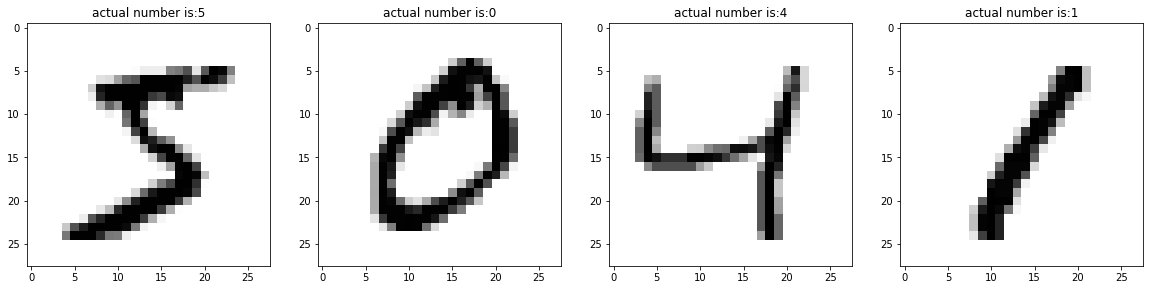

In [22]:
sample_train=train_data[:10]
sample_label=train_label[:10]
fig,axis=plt.subplots(1,4, figsize=(20,10))
for j, ax in enumerate(axis.flat):
    ax.imshow(sample_train[j],cmap='binary')
    digit=sample_label[j]
    ax.set(title=f'actual number is:{digit}')

# Data preprocessing #

In [23]:
train_data=train_data/255.0
test_data=test_data/255.0
train_data=train_data.reshape((train_data.shape +(1,))) # increase shape to (1,28,28,1)
test_data=test_data.reshape((test_data.shape +(1,)))
train_label=to_categorical(train_label)   
test_label=to_categorical(test_label)


# Model definition #

In [6]:
cnn=Sequential()
cnn.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu',input_shape=(28,28,1)))
cnn.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2,2)))
cnn.add(Flatten())
cnn.add(Dense(512,activation='relu'))
cnn.add(Dense(10,activation='softmax'))
cnn.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 64)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 9216)              0         
                                                                 
 dense (Dense)               (None, 512)               4719104   
                                                                 
 dense_1 (Dense)             (None, 10)                5130      
                                                        

# Model training #

In [7]:
tf.config.get_visible_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [8]:
history=cnn.fit(train_data,train_label,validation_data=(test_data,test_label),batch_size=64,epochs=10)

Epoch 1/20
938/938 [==============================] - 394s 12ms/step - loss: 0.1040 - accuracy: 0.9685 - val_loss: 0.0462 - val_accuracy: 0.9853
Epoch 2/20
938/938 [==============================] - 11s 12ms/step - loss: 0.0327 - accuracy: 0.9898 - val_loss: 0.0294 - val_accuracy: 0.9902
Epoch 3/20
938/938 [==============================] - 11s 12ms/step - loss: 0.0204 - accuracy: 0.9938 - val_loss: 0.0411 - val_accuracy: 0.9874
Epoch 4/20
938/938 [==============================] - 11s 12ms/step - loss: 0.0123 - accuracy: 0.9960 - val_loss: 0.0397 - val_accuracy: 0.9875
Epoch 5/20
938/938 [==============================] - 11s 11ms/step - loss: 0.0104 - accuracy: 0.9966 - val_loss: 0.0431 - val_accuracy: 0.9892
Epoch 6/20
938/938 [==============================] - 11s 12ms/step - loss: 0.0091 - accuracy: 0.9970 - val_loss: 0.0405 - val_accuracy: 0.9885
Epoch 7/20
938/938 [==============================] - 11s 12ms/step - loss: 0.0059 - accuracy: 0.9982 - val_loss: 0.0422 - val_accuracy

# Evaluation #

Text(0.5, 0.98, 'CNN training and validation curves')

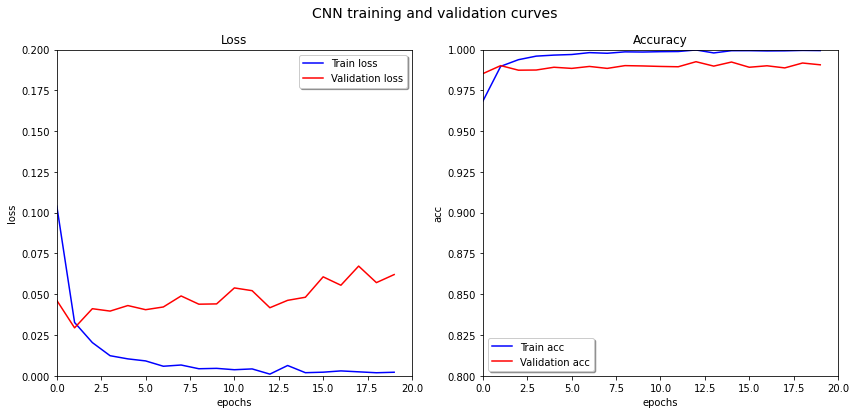

In [10]:
fig, ax=plt.subplots(1,2, figsize=(14,6))
x=np.linspace(2,20)
ax[0].plot(history.history['loss'], color='b', label='Train loss')
ax[0].plot(history.history['val_loss'], color='r', label='Validation loss',axes=ax[0])
ax[0].set_xlim(0,20)
ax[0].set_ylim(0,0.2)
ax[0].set_title('Loss')
ax[0].set_xlabel('epochs')
ax[0].set_ylabel('loss')
legend=ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], color='b', label='Train acc')
ax[1].plot(history.history['val_accuracy'], color='r', label='Validation acc')
ax[1].set_xlim(0,20)
ax[1].set_ylim(0.8,1)
ax[1].set_title('Accuracy')
ax[1].set_xlabel('epochs')
ax[1].set_ylabel('acc')
legend=ax[1].legend(loc='best', shadow=True)
fig.suptitle('CNN training and validation curves',fontsize=14)

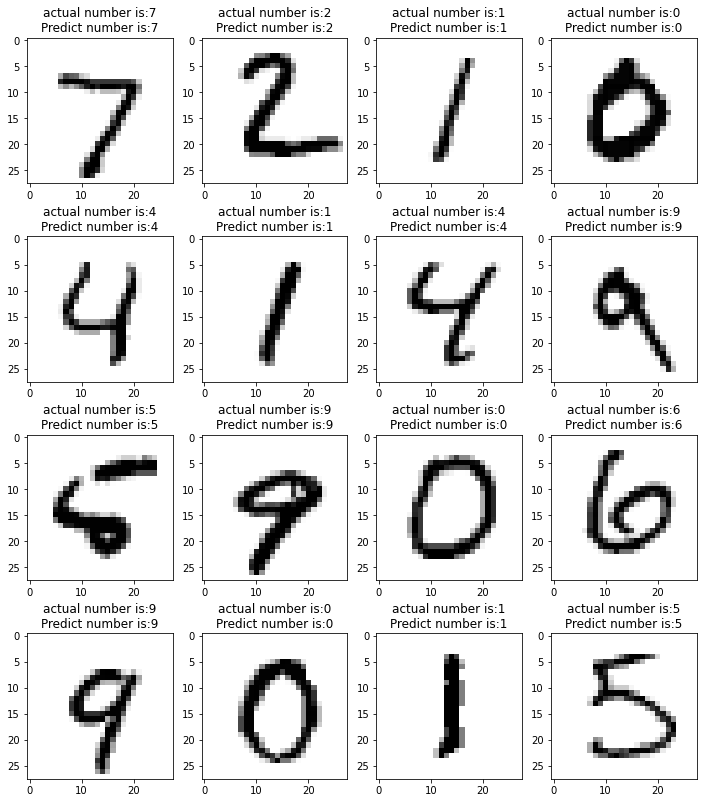

In [24]:
prediction=cnn.predict(test_data)
test_data_=test_data.reshape(test_data.shape[0],28,28)
fig,axis=plt.subplots(4,4, figsize=(12,14))
for j, ax in enumerate(axis.flat):
    ax.imshow(test_data_[j],cmap='binary')
    digit=test_label[j].argmax()
    ax.set(title=f'actual number is:{digit}\nPredict number is:{prediction[j].argmax()}')

In [25]:
## evaulate performance
loss,acc=cnn.evaluate(test_data,test_label,batch_size=64,verbose=0)
print('Test loss =',loss)
print('Test accuracy =',acc)

Test loss = 0.06207336485385895
Test accuracy = 0.9907000064849854
